In [1]:
import pandas as pd
import numpy as np 

import sys
sys.path.append('../../Function/')
import function

from keras.layers import Dense, Dropout
from keras.models import Sequential


In [2]:
df = pd.read_excel('../../../site_info_ver_5_light.xlsx')

In [4]:
# print(len(df))
# df1 = df[(df['Date'] < "2020-03-25") | (df['Date'] > "2020-05-04")]
# print(len(df1))

# df2 = df1[(df1['Date'] < "2020-09-18") | (df1['Date'] > "2020-10-17")]
# print(len(df2))
# df3 = df2[(df2['Date'] < "2020-12-27") | (df2['Date'] > "2021-02-07")]
# print(len(df3))
# df1 = df[(df['Date'] < "2020-02-27")]
# df1 = df1.loc[df1.Israelis_Count>0]
# df1 = df1.loc[df1.Israelis_Count<=4000]
# len(df1)
# df1.to_excel('../../../site_info_ver_5.xlsx')
# df_light = df1.loc[(df1.Site_Name=="Gan HaShlosha")|(df1.Site_Name=="Hermon Stream (Banias)")|(df1.Site_Name=="En Gedi")|(df1.Site_Name=="En Afek")]

# df_light.to_excel('../../../site_info_ver_5_light.xlsx')



In [6]:
dataset = df.copy()
dataset = dataset.loc[dataset.Israelis_Count<=2000]
dataset = dataset.loc[dataset.Israelis_Count>0]
dataset['Last_year_visitors_IL'] = 0
sites = dataset.Site_Name.unique()
target = 'Israelis_Count'
dataset = function.split_date(dataset)
dataset = function.move_target_to_last(dataset, target)
dataset = dataset.sort_values(['year','month','day'])
for site in sites:
    print(site)
    site_dataset = dataset.loc[dataset.Site_Name==site]
    site_dataset = function.last_year_entries_info(site_dataset,target)
    # print(site_dataset.Last_year_visitors_IL  )
    dataset.loc[dataset.Site_Name==site,'Last_year_visitors_IL'] = site_dataset.Last_year_visitors
    pass



En Afek


c:\Users\asars\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
c:\Users\asars\OneDrive\Share\סמסטר ו\פרוייקט\מודלים\Neural Networks\New Models\../../Function\function.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Last_year_visitors'] = dataframe.apply(lambda row : last_year_visitors(dataframe,row['day'],row['month'],row['year'],target) , axis = 1)
c:\Users\asars\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1

Add Last year visitors Successfully
En Gedi
Add Last year visitors Successfully
Hermon Stream (Banias)
Add Last year visitors Successfully
Gan HaShlosha
Add Last year visitors Successfully


In [7]:
dataset = dataset.astype({'day': 'category'})
dataset = dataset.astype({'month': 'category'})
dataset = dataset.astype({'year': 'category'})
print(dataset.dtypes)
print(dataset.shape)


Date                     datetime64[ns]
Site_Name                        object
Tourists_Count                    int64
Total                             int64
region_Central                    int64
                              ...      
Last_year_visitors_IL           float64
day                            category
month                          category
year                           category
Israelis_Count                    int64
Length: 90, dtype: object
(5067, 90)


In [9]:
dataset.set_index("Date",inplace=True)
dataset = dataset.drop(['Total','Tourists_Count','Day_before_Total'],axis=1)
dataset = function.remove_pollution_site(dataset)
print(dataset.info())
dataset = pd.get_dummies(dataset)
dataset

remove pollution site Successfully
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5067 entries, 2016-01-01 to 2020-02-26
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Site_Name                     5067 non-null   object  
 1   region_Central                5067 non-null   int64   
 2   region_Judea_Samaria          5067 non-null   int64   
 3   region_North                  5067 non-null   int64   
 4   region_South                  5067 non-null   int64   
 5   is_weekend                    5067 non-null   int64   
 6   operations                    5067 non-null   int64   
 7   is_jewish_holiday             5067 non-null   int64   
 8   is_jewish_vacation            5067 non-null   int64   
 9   is_muslims_holiday            5067 non-null   int64   
 10  is_muslims_vacation           5067 non-null   int64   
 11  is_camping                    5067 non-null   int64   


,region_Central,region_Judea_Samaria,region_North,region_South,is_weekend,operations,is_jewish_holiday,is_jewish_vacation,is_muslims_holiday,is_muslims_vacation,...,month_8,month_9,month_10,month_11,month_12,year_2016,year_2017,year_2018,year_2019,year_2020
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2016-01-01,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2016-01-01,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2016-01-02,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2016-01-02,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-25,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-02-26,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-02-26,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
dataset = function.move_target_to_last(dataset, target)

In [11]:
# dataset = dataset.drop(dataset.filter(regex='so2').columns, axis=1)
# dataset = dataset.drop(dataset.filter(regex='pm').columns, axis=1)
# dataset = dataset.drop(dataset.filter(regex='nox').columns, axis=1)
target_title = 'Israelis'

print('model on site all site')
print('Focus on ',target_title)

# dataset = function.remove_outliers(dataset, target)
dataset = function.remove_unique_one(dataset)
dataset = function.remove_high_corr(dataset, target,0.4)

print('shape of dataset',dataset.shape)
print('features :',dataset.columns)


model on site all site
Focus on  Israelis
shape of dataset (5067, 62)
features : Index(['is_weekend', 'operations', 'is_jewish_holiday', 'is_muslims_holiday',
       'is_archaeology', 'is_water', 'Temperature', 'Haifa_pm2.5',
       'Tel_Aviv-Yafo_nox', 'Jerusalem_nox', 'Beer-Sheva_nox', 'Haifa_so2',
       'Ashkelon_so2', 'Beer-Sheva_so2', 'Haifa_pm10_exceeded',
       'Ashkelon_pm10_exceeded', 'Tel_Aviv-Yafo_pm2.5_exceeded',
       'Haifa_pm2.5_exceeded', 'Beer-Sheva_pm2.5_exceeded',
       'Tel_Aviv-Yafo_nox_exceeded', 'Jerusalem_nox_exceeded',
       'Haifa_nox_exceeded', 'Season_spring', 'Season_summer', 'Season_winter',
       'Last_year_visitors_IL', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5',
       'day_6', 'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12',
       'day_13', 'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19',
       'day_20', 'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26',
       'day_27', 'day_28', 'day_29', 'day_30', 'day_31', 'mont

In [12]:
# round(len(dataset.loc[dataset.Israelis_Count>2000])/len(dataset)*100,2)

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = dataset.drop(target,axis=1)
y = dataset[target]
# X.drop(['Date','Tel_Aviv-Yafo_nox_exceeded','Season_spring','Season_autumn','Season_summer','Season_winter','Jerusalem_nox_exceeded'],axis=1,inplace=True)
X.reset_index(inplace=True,drop=True)
# print(X)
# X = X.drop(X.filter(regex='exceeded').columns, axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

X_train_scaler = MinMaxScaler()
X_test_scaler = MinMaxScaler()

X_train_scaled = X_train_scaler.fit_transform(X_train)
X_test_scaled = X_test_scaler.fit_transform(X_test)

y_train_scaled = np.log(y_train+0.001)
y_test_scaled = np.log(y_test+0.001)

# dataset_train = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
# dataset_test = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)



In [14]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train_scaled,y_train)

prediction =mlr.predict(X_test_scaled)

res = pd.DataFrame(
    data={
        'Prediction':prediction,
        'Actual': y_test.values
    },
    index=y_test.index
)

print('rmse',function.get_rmse(res.Prediction, res.Actual))
print('std',np.std(res.Actual))

coef = sorted( list(zip(np.round(mlr.coef_,3).T,X_train.columns)))
coef

rmse 907.5748028352122
std 492.69802475445414


[(-65252219238135.95, 'day_1'),
 (-65252219238121.75, 'day_2'),
 (-65252219238118.58, 'day_12'),
 (-65252219238115.15, 'day_14'),
 (-65252219238113.68, 'day_19'),
 (-65252219238105.93, 'day_30'),
 (-65252219238101.195, 'day_16'),
 (-65252219238098.805, 'day_4'),
 (-65252219238098.28, 'day_3'),
 (-65252219238097.76, 'day_28'),
 (-65252219238093.97, 'day_18'),
 (-65252219238082.664, 'day_11'),
 (-65252219238082.47, 'day_17'),
 (-65252219238079.44, 'day_20'),
 (-65252219238075.984, 'day_15'),
 (-65252219238073.95, 'day_9'),
 (-65252219238071.984, 'day_25'),
 (-65252219238071.47, 'day_31'),
 (-65252219238069.45, 'day_29'),
 (-65252219238067.49, 'day_5'),
 (-65252219238065.375, 'day_8'),
 (-65252219238060.92, 'day_27'),
 (-65252219238053.89, 'day_22'),
 (-65252219238052.67, 'day_7'),
 (-65252219238051.69, 'day_10'),
 (-65252219238048.13, 'day_23'),
 (-65252219238046.83, 'day_26'),
 (-65252219238044.914, 'day_6'),
 (-65252219238042.05, 'day_13'),
 (-65252219238037.69, 'day_21'),
 (-652522192

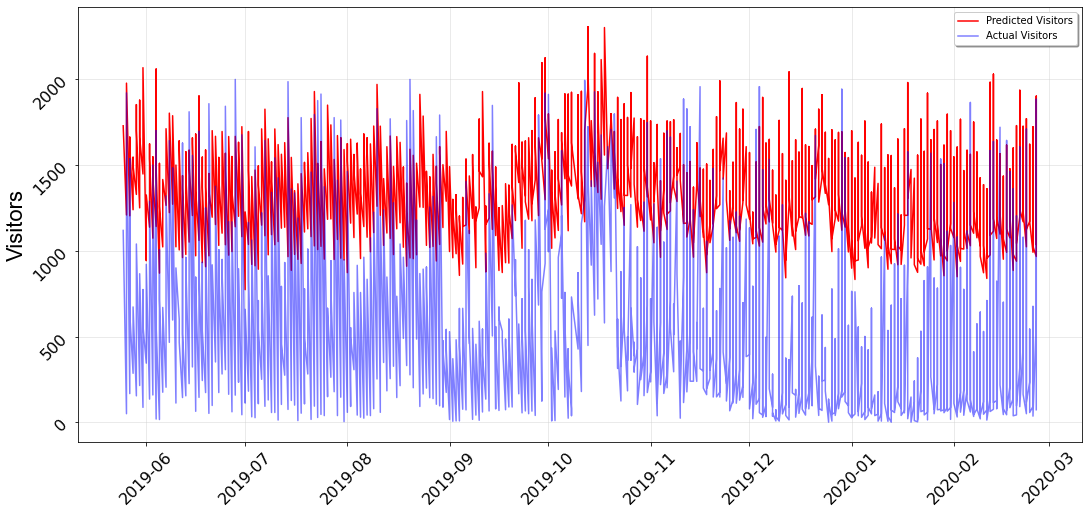

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


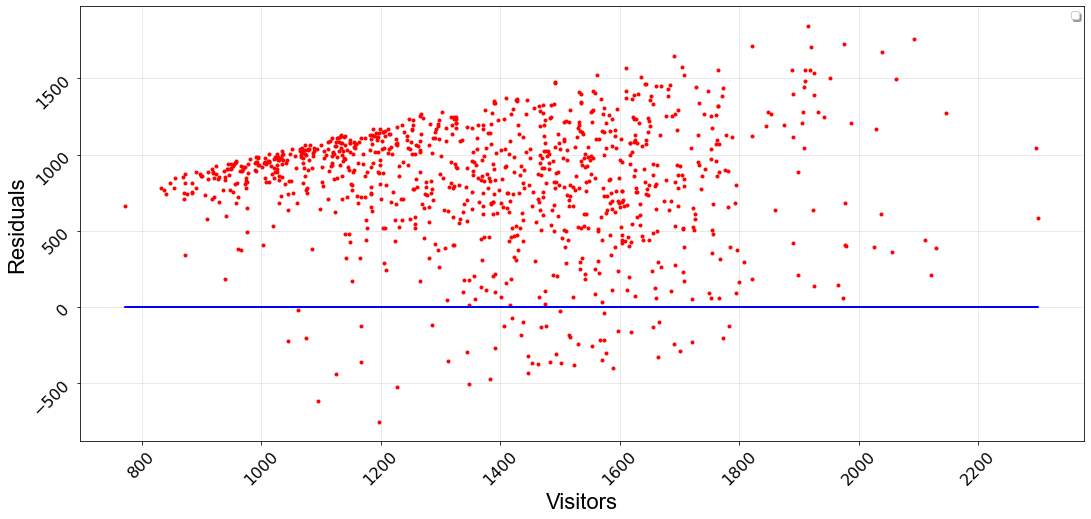

In [15]:
res.sort_index(inplace=True)
function.plot_line(res.Prediction, res.Actual,alpha_actual=0.5)
function.plot_residuals(res.Prediction, res.Actual)

In [16]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

# create ANN model
model = Sequential()
 
model.add(Dense(units=128, input_dim=X_train.shape[1]))
# model.add(Dropout(0.25))
model.add(Dense(units=1024, input_dim=X_train.shape[1]))
# model.add(Dropout(0.25))
model.add(Dense(units=1024, input_dim=X_train.shape[1]))
model.add(Dropout(0.25))
# model.add(Dense(units=8))
# model.add(Dropout(0.25))
# model.add(Dense(units=8))
# model.add(Dropout(0.25))
# model.add(Dense(units=8))
# model.add(Dropout(0.25))
# model.add(Dense(units=8))
# model.add(Dropout(0.25))
# model.add(Dense(units=128))
# model.add(Dropout(0.25))
# model.add(Dense(units=64))
# model.add(Dropout(0.25))
# # model.add(Dense(units=8))
# model.add(Dropout(0.25))

# # # model.add(Dense(units=16)
# # # model.add(Dropout(0.25))
# model.add(Dense(units=8))

model.add(Dense(1))
 
# Compiling the model
model.compile(metrics='mean_squared_error', optimizer='adam', loss ='mean_squared_error')
es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=10, verbose=1)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)
mcp = ModelCheckpoint(filepath='weights_ALL.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

tb = TensorBoard('logs')

history = model.fit(X_train_scaled, y_train, shuffle=True, epochs=1000, callbacks=[es, rlr, mcp, tb],validation_split=0.2,batch_size=100)

Epoch 1/1000
31/33 [===========================>..] - ETA: 0s - loss: 331748.2188 - mean_squared_error: 331748.2188
Epoch 00001: val_loss improved from inf to 213018.90625, saving model to weights_ALL.h5
33/33 [==============================] - 1s 20ms/step - loss: 326275.4375 - mean_squared_error: 326275.4375 - val_loss: 213018.9062 - val_mean_squared_error: 213018.9062 - lr: 0.0010
Epoch 2/1000
31/33 [===========================>..] - ETA: 0s - loss: 191770.7969 - mean_squared_error: 191770.7969
Epoch 00002: val_loss improved from 213018.90625 to 205297.18750, saving model to weights_ALL.h5
33/33 [==============================] - 1s 15ms/step - loss: 190525.1719 - mean_squared_error: 190525.1719 - val_loss: 205297.1875 - val_mean_squared_error: 205297.1875 - lr: 0.0010
Epoch 3/1000
30/33 [==========================>...] - ETA: 0s - loss: 167156.2812 - mean_squared_error: 167156.2812
Epoch 00003: val_loss improved from 205297.18750 to 185711.62500, saving model to weights_ALL.h5
33/3

In [17]:
model.load_weights('weights_ALL.h5')
prediction =model.predict(X_test_scaled)

res2 = pd.DataFrame(
    data={
        'Prediction':prediction.T[0],
        'Actual': y_test.values
    },
    index=y_test.index
)

print('rmse',function.get_rmse(res2.Prediction, res2.Actual))
print('std',np.std(res2.Actual))


rmse 438.5078190887553
std 492.69802475445414


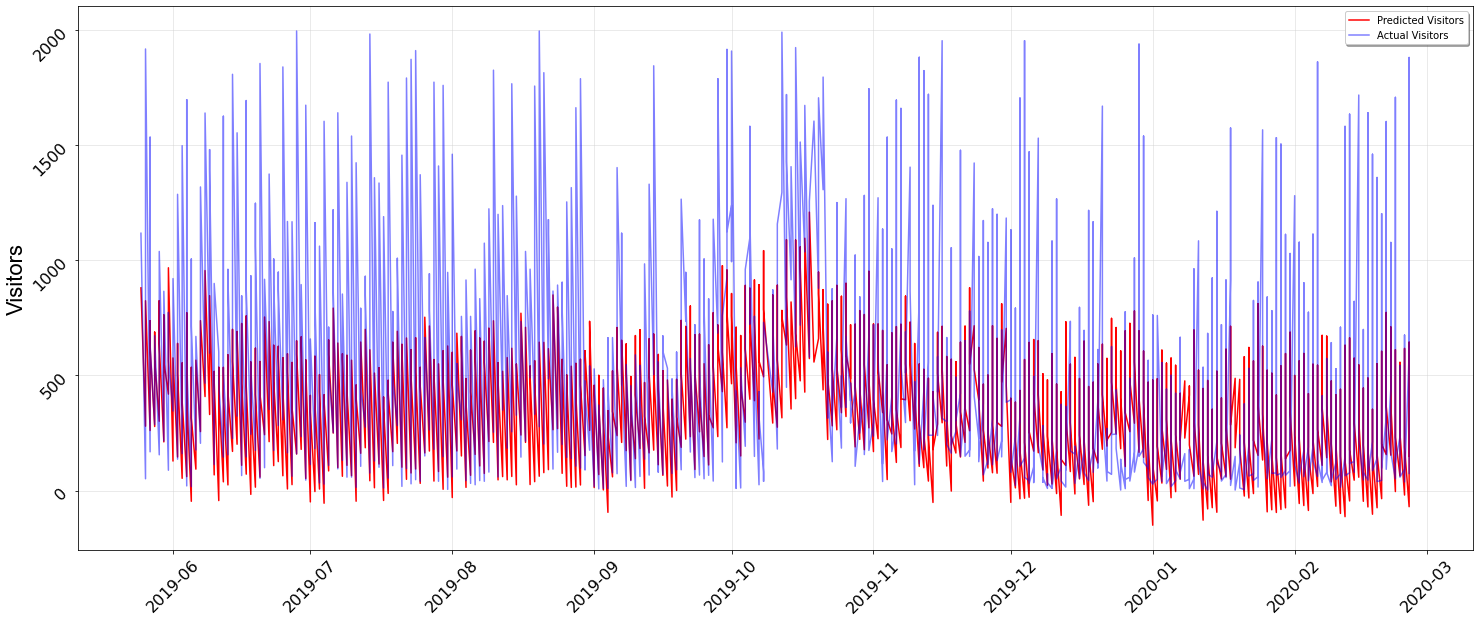

In [18]:
res2.sort_index(inplace=True)
function.plot_line(res2.Prediction, res2.Actual,alpha_actual=0.5,fig_size_tuple=(25,10))
# function.plot_residuals(res2.Prediction, res2.Actual)

In [19]:
rmse_str = str(np.round(function.get_rmse(res2.Prediction, res2.Actual),2))
import os 
# Check whether the specified path exists or not
path = 'All sites/'+rmse_str
isExist = os.path.exists(path)
if not isExist:
  os.makedirs(path)
model.save(path)

INFO:tensorflow:Assets written to: All sites/438.51\assets


In [20]:
from keras import backend
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard

# from keras import models
# new_model = models.load_model('All sites/236.2')
# new_model.summary()

from keras.models import load_model
model = load_model('All sites/236.2', custom_objects={'rmse':                   
rmse})

model.summary()
# model.load_weights('weights.h5')
prediction = np.exp(model.predict(X_test_scaled))

res2 = pd.DataFrame(
    data={
        'Prediction':prediction.T[0],
        'Actual': y_test.values
    },
    index=y_test.index
)

print('rmse',function.get_rmse(res2.Prediction, res2.Actual))
print('std',np.std(res2.Actual))

res2.sort_index(inplace=True)
function.plot_line(res2.Prediction, res2.Actual,alpha_actual=0.4)
function.plot_residuals(res2.Prediction, res2.Actual)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              92160     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              1

ValueError: in user code:

    File "c:\Users\asars\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\asars\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\asars\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\asars\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "c:\Users\asars\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\asars\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 89), found shape=(None, 61)
